<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [ ]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.8-cp312-cp312-macosx_11_0_arm64.whl size=264277 sha256=29e497dfdfc97cbbcc96b2025cc8758b05409491d4905663c2810b10368470bb
  Stored in directory: /Users/dilrubaaksoy/Library/Caches/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


In [9]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [11]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [13]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [19]:
import yfinance as yf
tesla_ticker = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [21]:
tesla_data = tesla_ticker.history(period="max")
print(tesla_data.head())
tesla_data.to_csv("tesla_data.csv", index=True)

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [23]:
tesla_data.reset_index(inplace=True)
print(tesla_data.head())
tesla_data.to_csv("tesla_data_reset.csv", index=False)

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [45]:
url= " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [59]:
response = requests.get(url)

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [61]:
html_data= response.text
soup= BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
> Note: Instead of using the deprecated pd.append() method, consider using pd.concat([df, pd.DataFrame], ignore_index=True).
```

</details>


In [97]:
tables= soup.find_all ('table')
tesla_revenue_table= None
for table in tables:
    if 'Tesla Quarterly Revenue' in table.text:
        tesla_revenue_table= table
        break

tesla_revenue= pd.DataFrame(columns=['Date', 'Revenue'])

for row in tesla_revenue_table.find_all('tr')[1:]:
    columns= row.find_all('td')
    if len(columns)>1:
        date= columns[0].text.strip()
        revenue= columns [1].text.strip()

revenue= revenue.replace('$', '').replace (',', '')
new_row= pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
tesla_revenue= pd.concat([tesla_revenue, new_row], ignore_index=True)
print(tesla_revenue)

         Date Revenue
0  2009-06-30      27


In [99]:
print(tesla_revenue.shape)

(1, 2)


In [101]:
print(tesla_revenue_table.prettify())

<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Tesla Quarterly Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2022-09-30
   </td>
   <td style="text-align:center">
    $21,454
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022-06-30
   </td>
   <td style="text-align:center">
    $16,934
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022-03-31
   </td>
   <td style="text-align:center">
    $18,756
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-12-31
   </td>
   <td style="text-align:center">
    $17,719
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-09-30
   </td>
   <td style="text-align:center">
    $13,757
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-06-30
   </td>
   <td style="text-align:center">
    $11,95

In [103]:
for row in tesla_revenue_table.find_all('tr')[1:]:
    columns = row.find_all('td')
    if len(columns) > 1:
        date = columns[0].text.strip()
        revenue = columns[1].text.strip()
        print(f"Date: {date}, Revenue: {revenue}")
        revenue = revenue.replace('$', '').replace(',', '')

        new_row = pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
        tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

Date: 2022-09-30, Revenue: $21,454
Date: 2022-06-30, Revenue: $16,934
Date: 2022-03-31, Revenue: $18,756
Date: 2021-12-31, Revenue: $17,719
Date: 2021-09-30, Revenue: $13,757
Date: 2021-06-30, Revenue: $11,958
Date: 2021-03-31, Revenue: $10,389
Date: 2020-12-31, Revenue: $10,744
Date: 2020-09-30, Revenue: $8,771
Date: 2020-06-30, Revenue: $6,036
Date: 2020-03-31, Revenue: $5,985
Date: 2019-12-31, Revenue: $7,384
Date: 2019-09-30, Revenue: $6,303
Date: 2019-06-30, Revenue: $6,350
Date: 2019-03-31, Revenue: $4,541
Date: 2018-12-31, Revenue: $7,226
Date: 2018-09-30, Revenue: $6,824
Date: 2018-06-30, Revenue: $4,002
Date: 2018-03-31, Revenue: $3,409
Date: 2017-12-31, Revenue: $3,288
Date: 2017-09-30, Revenue: $2,985
Date: 2017-06-30, Revenue: $2,790
Date: 2017-03-31, Revenue: $2,696
Date: 2016-12-31, Revenue: $2,285
Date: 2016-09-30, Revenue: $2,298
Date: 2016-06-30, Revenue: $1,270
Date: 2016-03-31, Revenue: $1,147
Date: 2015-12-31, Revenue: $1,214
Date: 2015-09-30, Revenue: $937
Date: 20

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [105]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$',"", regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [107]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [109]:
print(tesla_revenue.tail())

          Date Revenue
49  2010-09-30      31
50  2010-06-30      28
51  2010-03-31      21
53  2009-09-30      46
54  2009-06-30      27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [111]:
import yfinance as yf
gme=yf.Ticker ("GME")
print(gme)

yfinance.Ticker object <GME>


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [113]:
gme_history= gme.history(period="max")
print(gme_history)

                                Open       High        Low      Close  \
Date                                                                    
2002-02-13 00:00:00-05:00   1.620128   1.693349   1.603295   1.691666   
2002-02-14 00:00:00-05:00   1.712707   1.716074   1.670626   1.683250   
2002-02-15 00:00:00-05:00   1.683250   1.687458   1.658002   1.674834   
2002-02-19 00:00:00-05:00   1.666418   1.666418   1.578047   1.607504   
2002-02-20 00:00:00-05:00   1.615921   1.662210   1.603296   1.662210   
...                              ...        ...        ...        ...   
2025-01-13 00:00:00-05:00  31.600000  31.799999  30.900000  31.020000   
2025-01-14 00:00:00-05:00  31.260000  31.680000  27.559999  27.879999   
2025-01-15 00:00:00-05:00  28.900000  29.330000  27.840000  27.959999   
2025-01-16 00:00:00-05:00  27.940001  28.139999  27.410000  27.719999   
2025-01-17 00:00:00-05:00  27.610001  28.790001  27.020000  27.510000   

                             Volume  Dividends  St

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [117]:
gme_data= gme.history ("max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [5]:
import requests
url= " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response= requests.get(url)
html_data_2= response.text
print (html_data_2)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [27]:
import pandas as pd
from bs4 import BeautifulSoup
soup= BeautifulSoup(html_data_2, 'html.parser')
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript"></script><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript"></

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [35]:
tables=soup.find_all('table')
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_table= table
        break
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in gme_table.find ("tbody").find_all("tr"):
    columns= row.find_all ("td")
    if len(columns) ==2:
        date= columns[0].text.strip()
        revenue= columns[1].text.strip()
        revenue = revenue.replace("$", "").replace(",", "")
        gme_revenue = pd.concat(
            [gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
            ignore_index=True,
        )
print(gme_revenue.head())

         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [37]:
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


[*********************100%***********************]  1 of 1 completed


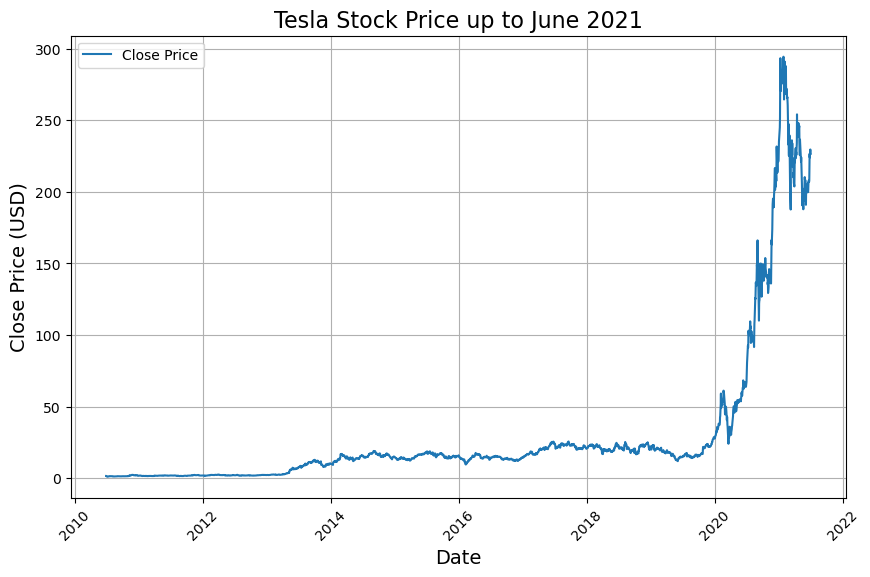

In [57]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
tesla_data= yf.download('TSLA')
tesla_data = tesla_data.reset_index()
tesla_data['Date']= pd.to_datetime(tesla_data['Date'])
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']
tesla_data_filtered= tesla_data_filtered.sort_values(by="Date")
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label="Close Price")
    plt.title(title, fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Close Price (USD)", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()
make_graph(tesla_data_filtered, "Tesla Stock Price up to June 2021")

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


[*********************100%***********************]  1 of 1 completed


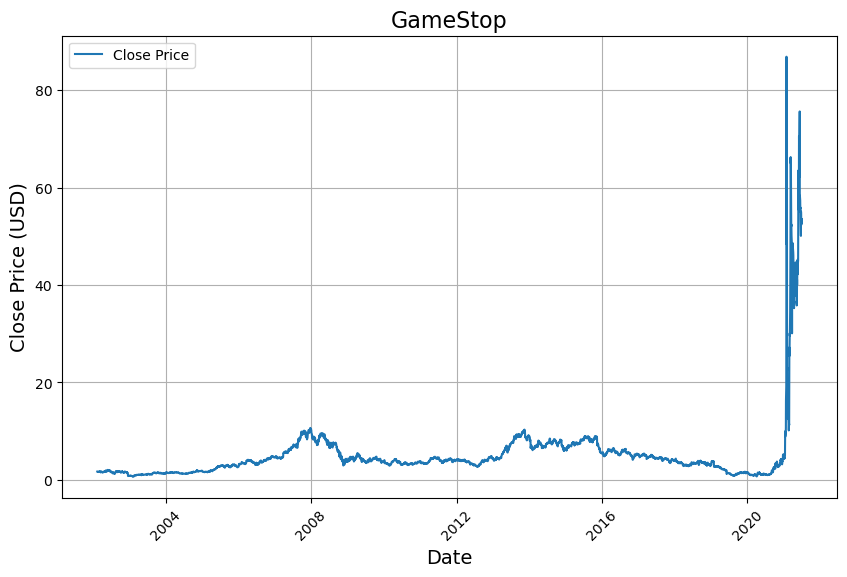

In [67]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

gme_data= yf.download('GME')
gme_data=gme_data.reset_index()
gme_data['Date']= pd.to_datetime(gme_data['Date'])
gme_data_filtered= gme_data[gme_data['Date'] <= '2021-06-30']
gme_data_filtered= gme_data_filtered.sort_values(by="Date")

make_graph(gme_data_filtered, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
